In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

### Data Cleaning:

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import geodatasets as gds
fao = pd.read_csv('Datasets/FAO.csv' , encoding='latin1')
faostat = pd.read_csv('Datasets/faostat.csv' , encoding='latin1')

In [43]:
## Create data dictionary for FAO DataFrame
fao_data_dictionary = pd.DataFrame({
    'Column Name': fao.columns,
    'Data Type': fao.dtypes,
    'Description': [
        'Abbreviation of the area (country or region)',
        'Numeric code representing the area',
        'Name of the area (country or region)',
        'Numeric code representing the item (e.g., crop, livestock)',
        'Name of the item (e.g., crop, livestock)',
        'Numeric code representing the element (e.g., production, yield)',
        'Name of the element (e.g., production, yield)',
        'Unit of measurement (e.g., tonnes, hectares)',
        'Latitude of the area, if applicable',
        'Longitude of the area, if applicable',
        'Values for each year from 1961 to 2013, representing the data for the respective year'
    ] + [''] * (len(fao.columns) - 11)  # Fill remaining descriptions if needed
})

# Create data dictionary for FAOSTAT DataFrame
faostat_data_dictionary = pd.DataFrame({
    'Column Name': faostat.columns,
    'Data Type': faostat.dtypes,
    'Description': [
        'Code representing the domain of the data (e.g., crops, livestock)',
        'Name of the domain (e.g., crops, livestock)',
        'Numeric code representing the area (country or region)',
        'Name of the area (country or region)',
        'Numeric code representing the element (e.g., production, yield)',
        'Name of the element (e.g., production, yield)',
        'Numeric code representing the item (e.g., crop, livestock)',
        'Name of the item (e.g., crop, livestock)',
        'Numeric code representing the year of the data entry',
        'Year of the data entry',
        'Unit of measurement (e.g., tonnes, hectares)',
        'Value of the data point',
        'Code indicating special notes or exceptions about the data point',
        'Description of the flag',
        'Additional notes or comments regarding the data point'
    ] + [''] * (len(faostat.columns) - 15)  # Fill remaining descriptions if needed
})

In [44]:
# Handling Missing Values
# Checking for missing values
fao_missing = fao.isnull().sum()
fao_stat_missing = faostat.isnull().sum()

print(fao_missing)
print(fao_stat_missing)

# Replace NaN values with 0 in the fao DataFrame
fao = fao.fillna(0)

# Replace NaN values with 0 in the faostat DataFrame
faostat = faostat.fillna(0)

print(fao_missing)
print(fao_stat_missing)

Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64
Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
dtype: int64
Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64
Domain Code         0
Domain              0
Area Code    

In [45]:
# Removing Duplicates
fao.drop_duplicates()
faostat.drop_duplicates()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,35530.081,X,International reliable sources,"UNDESA, Population Division â World Populati..."
1,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,2930.187,X,International reliable sources,"UNDESA, Population Division â World Populati..."
2,OA,Annual population,4,Algeria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,41318.142,X,International reliable sources,"UNDESA, Population Division â World Populati..."
3,OA,Annual population,5,American Samoa,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,55.641,X,International reliable sources,"UNDESA, Population Division â World Populati..."
4,OA,Annual population,6,Andorra,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,76.965,X,International reliable sources,"UNDESA, Population Division â World Populati..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,OA,Annual population,205,Western Sahara,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,552.628,X,International reliable sources,"UNDESA, Population Division â World Populati..."
227,OA,Annual population,249,Yemen,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,28250.420,X,International reliable sources,"UNDESA, Population Division â World Populati..."
228,OA,Annual population,251,Zambia,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,17094.130,X,International reliable sources,"UNDESA, Population Division â World Populati..."
229,OA,Annual population,181,Zimbabwe,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,16529.904,X,International reliable sources,"UNDESA, Population Division â World Populati..."


In [46]:
# Standardizing Column Names
fao.columns = fao.columns.str.lower().str.replace(' ', '_')
faostat.columns = faostat.columns.str.lower().str.replace(' ', '_')

### Data Merging

#### Variable Removal and Retention Justifications
###### - area_abbreviation: This column is likely a shorthand version of Area. Since Area is more descriptive and already retained, area_abbreviation is redundant.
###### - element_code: Actual Element names such as "Food/Feed" are more useful to the analysis, element_code is dropped because of redundancy.
###### - latitude and longitude: These columns provide geographic coordinates. While useful in spatial analysis, they may not be necessary for the analysis.

###### - area: merging the two dataset will have a redundant area column, hence one was dropped (fao_stat)

In [47]:
#Drop columns from fao
fao_drop = fao.drop(columns=['area_abbreviation', 'element_code', 'latitude', 'longitude'], errors='ignore')
#Drop these columns from fao_stat: Domain Code, Element Code, Element,Item, Code,Item,Year Code, Flag, Flag Description,Note
fao_stat_drop= faostat.drop(columns=[
    'area',
    'domain_code',
    'element_code',
    'element',
    'item_code',
    'item',
    'year_code',
    'flag',
    'flag_description',
    'note'
], errors='ignore')

# Merging the datasets on 'Area Code'
merged_df = pd.merge(fao_drop, fao_stat_drop, on='area_code', how='inner')

merged_df.head(10)

,area_code,area,item_code,item,element,unit_x,y1961,y1962,y1963,y1964,...,y2008,y2009,y2010,y2011,y2012,y2013,domain,year,unit_y,value
0,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,...,4252.0,4538.0,4605.0,4711.0,4810,4895,Annual population,2017,1000 persons,35530.081
1,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,...,490.0,415.0,442.0,476.0,425,422,Annual population,2017,1000 persons,35530.081
2,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,...,230.0,379.0,315.0,203.0,367,360,Annual population,2017,1000 persons,35530.081
3,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,...,62.0,55.0,60.0,72.0,78,89,Annual population,2017,1000 persons,35530.081
4,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,...,247.0,195.0,178.0,191.0,200,200,Annual population,2017,1000 persons,35530.081
5,2,Afghanistan,2514,Maize and products,Food,1000 tonnes,403.0,403.0,410.0,415.0,...,69.0,71.0,82.0,73.0,77,76,Annual population,2017,1000 persons,35530.081
6,2,Afghanistan,2517,Millet and products,Food,1000 tonnes,17.0,18.0,19.0,20.0,...,21.0,18.0,14.0,14.0,14,12,Annual population,2017,1000 persons,35530.081
7,2,Afghanistan,2520,"Cereals, Other",Food,1000 tonnes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,Annual population,2017,1000 persons,35530.081
8,2,Afghanistan,2531,Potatoes and products,Food,1000 tonnes,111.0,97.0,103.0,110.0,...,242.0,250.0,192.0,169.0,196,230,Annual population,2017,1000 persons,35530.081
9,2,Afghanistan,2536,Sugar cane,Feed,1000 tonnes,45.0,45.0,45.0,45.0,...,54.0,114.0,83.0,83.0,69,81,Annual population,2017,1000 persons,35530.081


In [48]:
# Map the Countries to their Region - Plotting data for hundreds of countries individually can result in cluttered and overwhelming visualizations.
# Regions consolidate countries, making the visualizations more comprehensible.

# Create a dictionary mapping countries to their respective regions
region_mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'American Samoa': 'Oceania',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Anguilla': 'Americas',
    'Antigua and Barbuda': 'Americas',
    'Argentina': 'Americas',
    'Armenia': 'Asia',
    'Aruba': 'Americas',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'Americas',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'Americas',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'Americas',
    'Benin': 'Africa',
    'Bermuda': 'Americas',
    'Bhutan': 'Asia',
    'Bolivia (Plurinational State of)': 'Americas',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'Americas',
    'British Virgin Islands': 'Americas',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'Americas',
    'Cayman Islands': 'Americas',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Channel Islands': 'Europe',
    'Chile': 'Americas',
    'China, Hong Kong SAR': 'Asia',
    'China, Macao SAR': 'Asia',
    'China, mainland': 'Asia',
    'China, Taiwan Province of': 'Asia',
    'Colombia': 'Americas',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Cook Islands': 'Oceania',
    'Costa Rica': 'Americas',
    'Côte d\'Ivoire': 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'Americas',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    'Democratic People\'s Republic of Korea': 'Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'Americas',
    'Dominican Republic': 'Americas',
    'Ecuador': 'Americas',
    'Egypt': 'Africa',
    'El Salvador': 'Americas',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Falkland Islands (Malvinas)': 'Americas',
    'Faroe Islands': 'Europe',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'French Guiana': 'Americas',
    'French Polynesia': 'Oceania',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Greece': 'Europe',
    'Greenland': 'Americas',
    'Grenada': 'Americas',
    'Guadeloupe': 'Americas',
    'Guam': 'Oceania',
    'Guatemala': 'Americas',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'Americas',
    'Haiti': 'Americas',
    'Holy See': 'Europe',
    'Honduras': 'Americas',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Isle of Man': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'Americas',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Lao People\'s Democratic Republic': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Martinique': 'Americas',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mayotte': 'Africa',
    'Mexico': 'Americas',
    'Micronesia (Federated States of)': 'Oceania',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Montserrat': 'Americas',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania',
    'Nicaragua': 'Americas',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'Northern Mariana Islands': 'Oceania',
    'Norway': 'Europe',
    'Palestine': 'Asia',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'Americas',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'Americas',
    'Peru': 'Americas',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto Rico': 'Americas',
    'Qatar': 'Asia',
    'Republic of Korea': 'Asia',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Helena, Ascension and Tristan da Cunha': 'Africa',
    'Saint Kitts and Nevis': 'Americas',
    'Saint Lucia': 'Americas',
    'Saint Pierre and Miquelon': 'Americas',
    'Saint Vincent and the Grenadines': 'Americas',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'Americas',
    'Eswatini': 'Africa',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'North Macedonia': 'Europe',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tokelau': 'Oceania',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'Americas',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Turks and Caicos Islands': 'Americas',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'Americas',
    'United States Virgin Islands': 'Americas',
    'Uruguay': 'Americas',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'Americas',
    'Viet Nam': 'Asia',
    'Wallis and Futuna Islands': 'Oceania',
    'Western Sahara': 'Africa',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
    'China': 'Asia'
}

# Assign the regions to the DataFrame
merged_df['region'] = merged_df['area'].map(region_mapping)

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_code  21477 non-null  int64  
 1   area       21477 non-null  object 
 2   item_code  21477 non-null  int64  
 3   item       21477 non-null  object 
 4   element    21477 non-null  object 
 5   unit_x     21477 non-null  object 
 6   y1961      21477 non-null  float64
 7   y1962      21477 non-null  float64
 8   y1963      21477 non-null  float64
 9   y1964      21477 non-null  float64
 10  y1965      21477 non-null  float64
 11  y1966      21477 non-null  float64
 12  y1967      21477 non-null  float64
 13  y1968      21477 non-null  float64
 14  y1969      21477 non-null  float64
 15  y1970      21477 non-null  float64
 16  y1971      21477 non-null  float64
 17  y1972      21477 non-null  float64
 18  y1973      21477 non-null  float64
 19  y1974      21477 non-null  float64
 20  y1975 

### 1.3 Feature Engineering

In [50]:
# Add a new column 'Row_Mean' that calculates the mean across Y1961 to Y2013 for each row
year_columns = [col for col in fao.columns if col.startswith(('y1', 'y2'))]
merged_df['average_availability'] = merged_df[year_columns].mean(axis=1)

In [51]:
# 2. Calculate Food or Feed Availability Relative to 2017 Population (Scaled to 2017 Population)
merged_df['availability_per_capita'] = merged_df['average_availability'] / merged_df['value']

#We can add total food balance through the years, calories,

# Task 2: Data Exploration

### 2.1 Descriptive Statistics:

In [52]:
# Summary statistics
print(merged_df.describe())

          area_code     item_code          y1961          y1962  \
count  21477.000000  21477.000000   21477.000000   21477.000000   
mean     125.449411   2694.211529     163.086604     167.697164   
std       72.868149    148.973406    1705.160828    1723.638749   
min        1.000000   2511.000000       0.000000       0.000000   
25%       63.000000   2561.000000       0.000000       0.000000   
50%      120.000000   2640.000000       0.000000       0.000000   
75%      188.000000   2782.000000      11.000000      12.000000   
max      276.000000   2961.000000  112227.000000  109130.000000   

               y1963          y1964          y1965          y1966  \
count   21477.000000   21477.000000   21477.000000   21477.000000   
mean      171.607953     175.333846     181.707548     188.750291   
std      1702.632886    1703.461304    1843.214462    1921.226819   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000 

### 2.2 Group-Based Analysis:



In [53]:
# 1. Group by 'Area' (Country) and 'Element' (Food or Feed) to calculate the mean availability over time
grouped_df = merged_df.groupby(['area', 'element'])[year_columns].mean().reset_index()

# Display the first few rows of the grouped data
print(grouped_df.head())


          area element       y1961       y1962       y1963       y1964  \
0  Afghanistan    Feed   72.000000   72.000000   73.600000   74.000000   
1  Afghanistan    Food  120.013699  119.095890  115.863014  129.178082   
2      Albania    Feed    3.760000    4.320000    4.960000    4.880000   
3      Albania    Food   16.448980   16.744898   16.765306   18.030612   
4      Algeria    Feed    3.772727    4.272727    2.863636    4.454545   

        y1965       y1966       y1967       y1968  ...       y2004  \
0   72.000000   72.400000   78.800000   82.600000  ...   70.400000   
1  133.602740  129.383562  143.849315  146.328767  ...  216.958904   
2    3.800000    7.880000    8.080000    9.160000  ...   39.600000   
3   18.255102   18.346939   18.816327   19.795918  ...   57.622449   
4    3.818182    2.500000    3.363636    5.909091  ...  207.954545   

        y2005       y2006       y2007       y2008       y2009       y2010  \
0  118.400000  134.200000  139.200000  129.400000  161.60

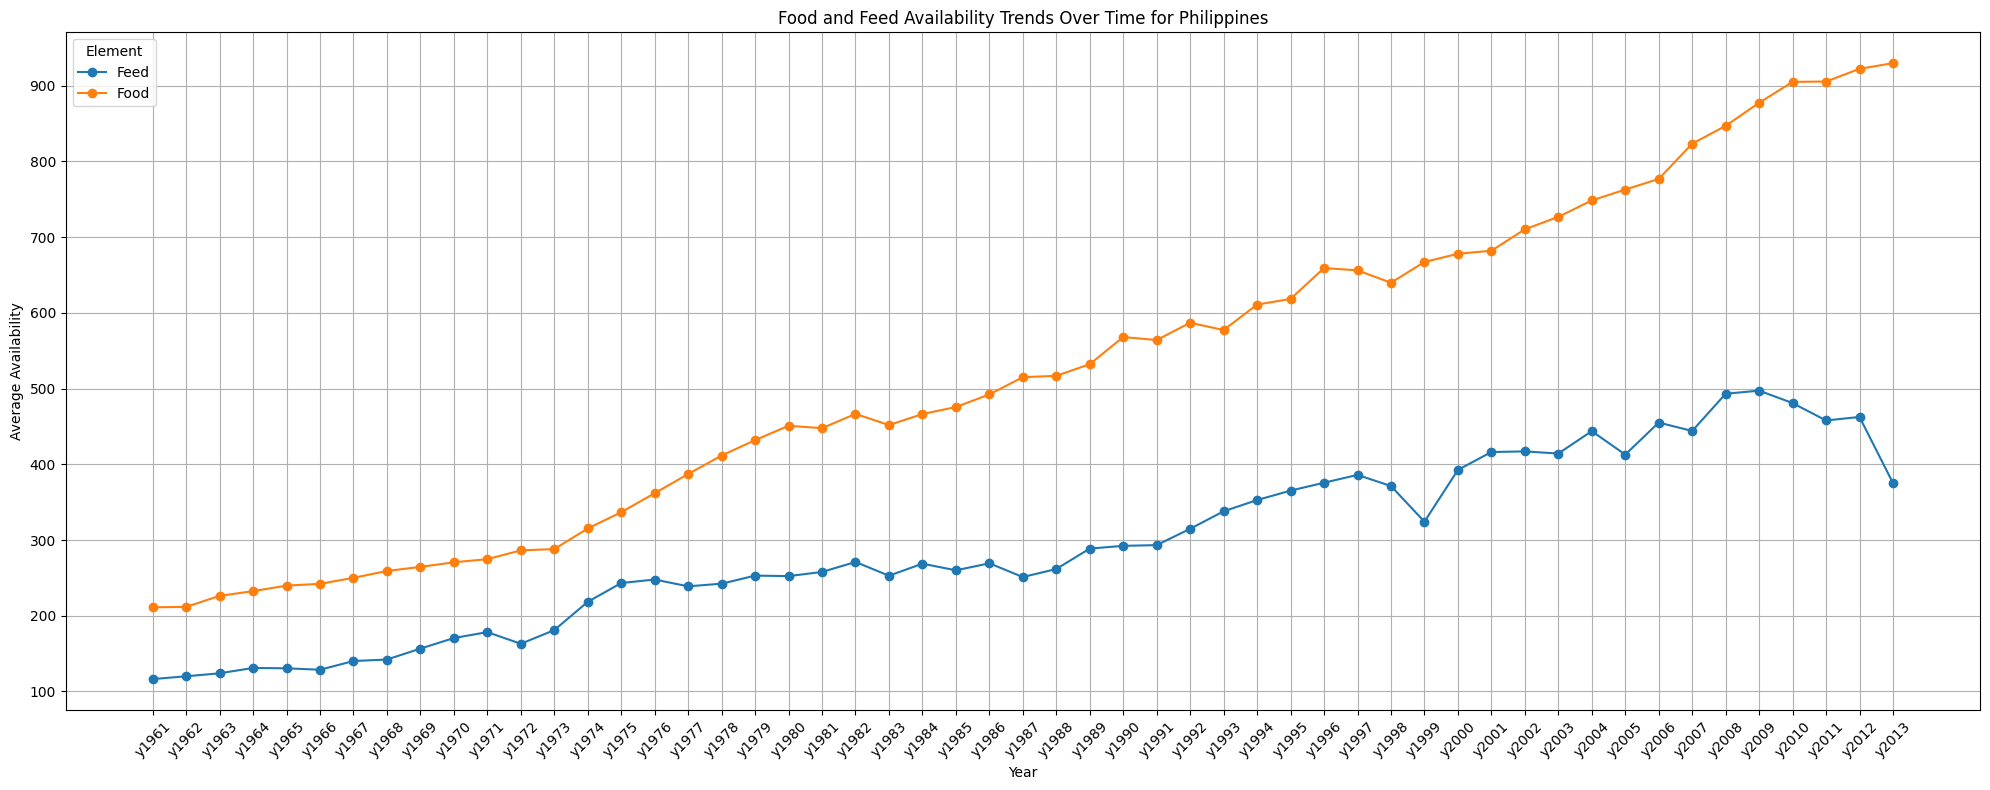

In [54]:
# Selected country
selected_country = 'Philippines'

# Filter data for the selected country
country_data = grouped_df[grouped_df['area'] == selected_country]

plt.figure(figsize=(20, 8))

# Plot each element's data over the years
for element in country_data['element'].unique():
        element_data = country_data[country_data['element'] == element]
        plt.plot(year_columns, element_data[year_columns].values.flatten(), marker='o', label=element)

# Customize plot
plt.title(f'Food and Feed Availability Trends Over Time for {selected_country}')
plt.xlabel('Year')
plt.ylabel('Average Availability')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Element')
plt.tight_layout()
plt.show()

### 2.3 Correlation Analysis

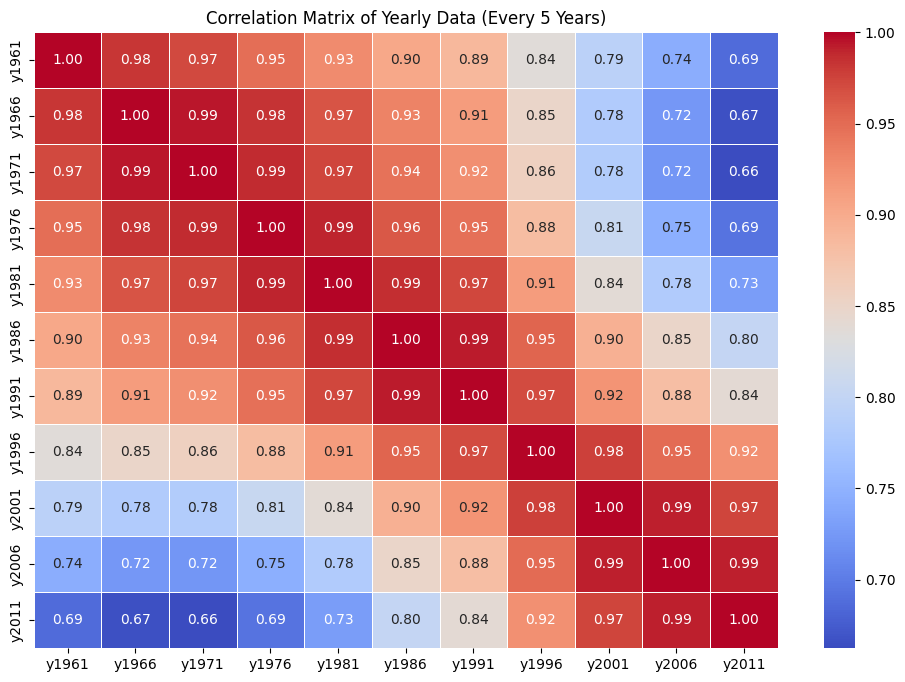

In [55]:
def extract_year(col):
    try:
        return int(col[1:])
    except ValueError:
        return None

# Filter year columns by every 5 years
selected_year_columns = [col for col in year_columns if extract_year(col) % 5 == 1]

# Select only the filtered year columns for correlation analysis
year_data = merged_df[selected_year_columns]

# Compute the correlation matrix
correlation_matrix = year_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Yearly Data (Every 5 Years)')
plt.show()

# Task 3: Data Visualization

### 3.1 Time Series Analysis

In [56]:
# fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])
# countries = fao['area'].unique()
# for country in countries:
#     df_country = fao_top[fao_top['area'] == country]
#     year_columns = [col for col in df_country.columns if col.startswith('y')]

#     df_melted = df_country.melt(id_vars=['area', 'item'], value_vars=year_columns, var_name='Year', value_name='Value')

#     df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

#     df_average = df_melted.groupby('item')['Value'].mean().reset_index()

#     df_average = df_average.rename(columns={'Value': 'AverageValue'})

#     df_top10 = df_average.sort_values(by='AverageValue', ascending=False).head(10)

#     print(df_top10)

#     plt.figure(figsize=(10, 6))
#     plt.bar(df_top10['item'], df_top10['AverageValue'], color='skyblue')
#     plt.title(f'Top 10 Items in {country} Based on Average Value')
#     plt.xlabel('Item')
#     plt.ylabel('Average Value')
#     plt.xticks(rotation=90)
#     plt.grid(True)

#     plt.show()

In [57]:
# Assuming fao_top DataFrame already has a 'Region' column
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Get the most recent year dynamically
year_columns = [col for col in fao_top.columns if col.startswith('Y')]
most_recent_year = max(year_data, key=lambda x: int(x[1:]))

# Iterate over unique regions
regions = merged_df['region'].unique()
for region in regions:
    # Filter the data for the current region
    df_region = merged_df[merged_df['region'] == region]

    # Filter out rows with NaN values in the most recent year
    df_recent = df_region.dropna(subset=[most_recent_year])

    # Calculate the value for the most recent year per item for the current region
    df_recent_values = df_recent.groupby('item')[most_recent_year].sum().reset_index()
    df_recent_values = df_recent_values.rename(columns={most_recent_year: 'RecentYearValue'})

    # Get the top 10 items by least availability in the most recent year
    df_least10 = df_recent_values.sort_values(by='RecentYearValue', ascending=True).head(10)

In [58]:











most_recent_yearr = 'y2013'

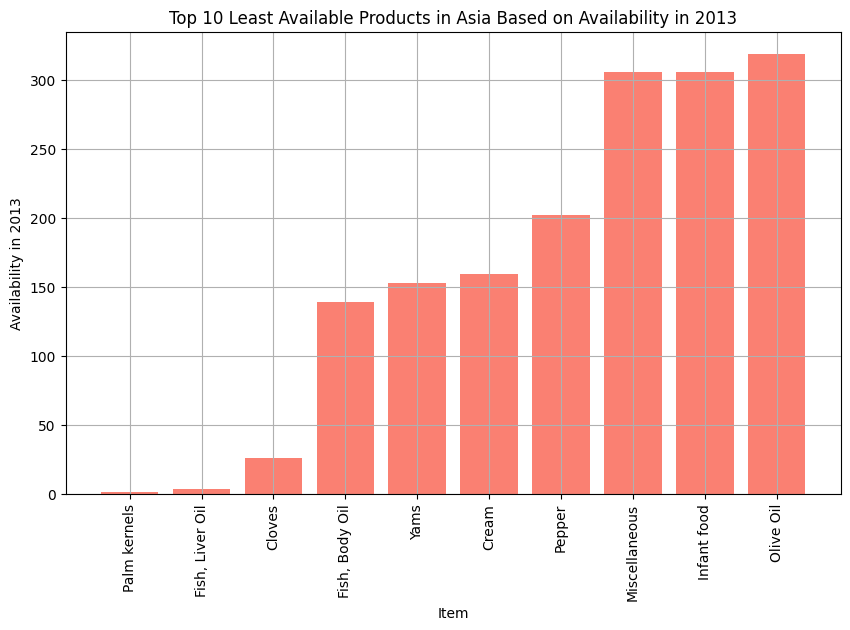

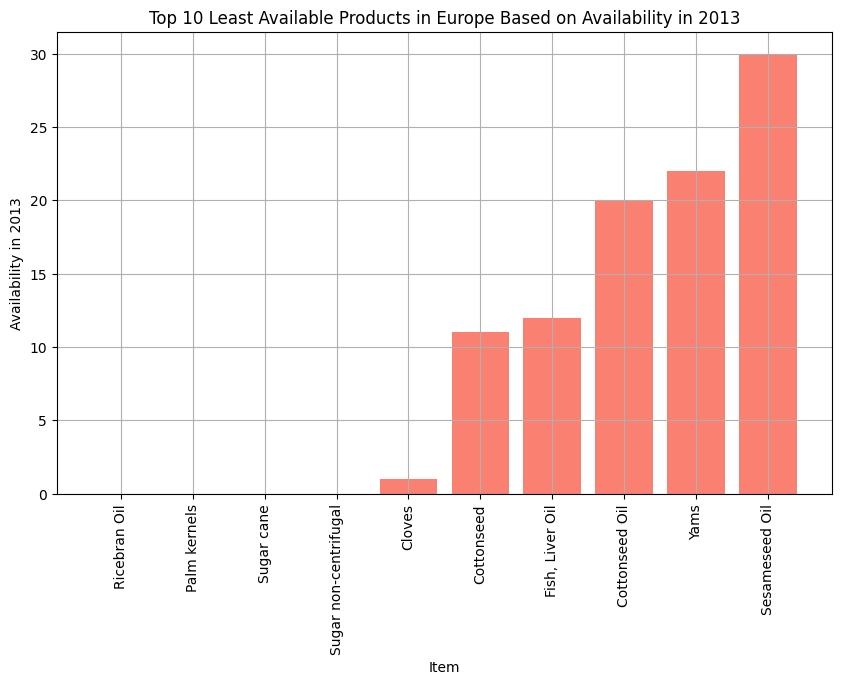

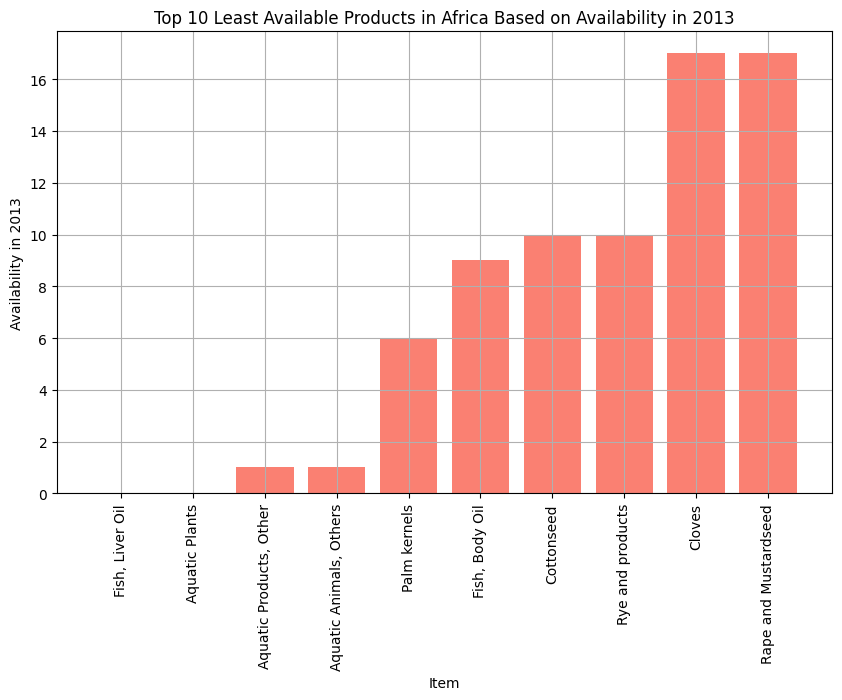

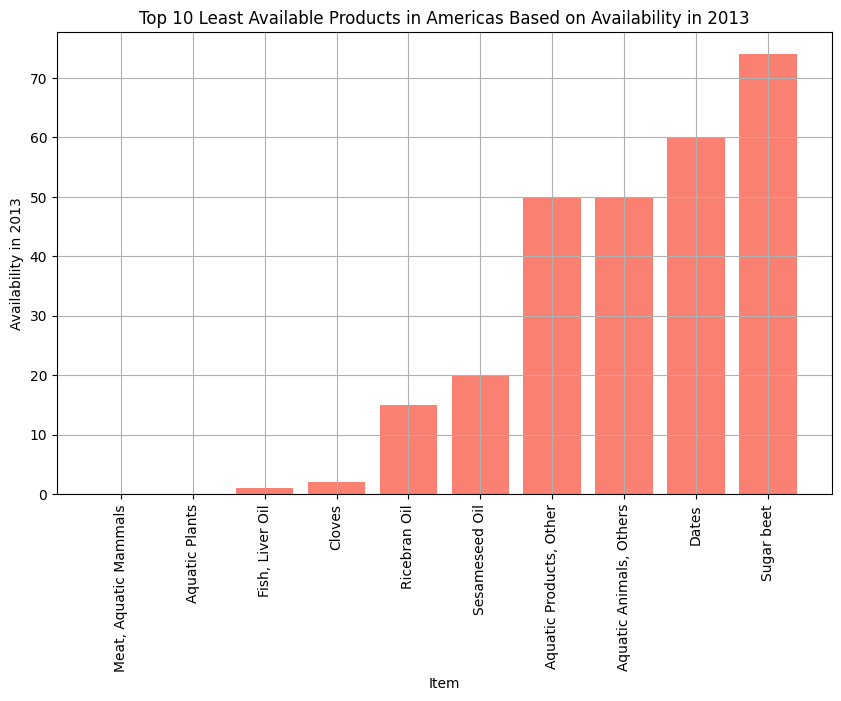

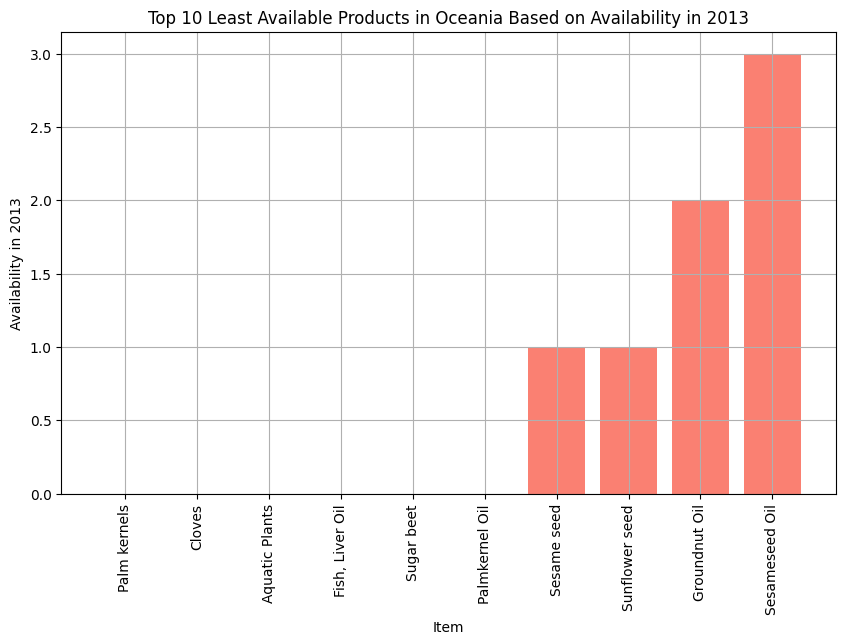

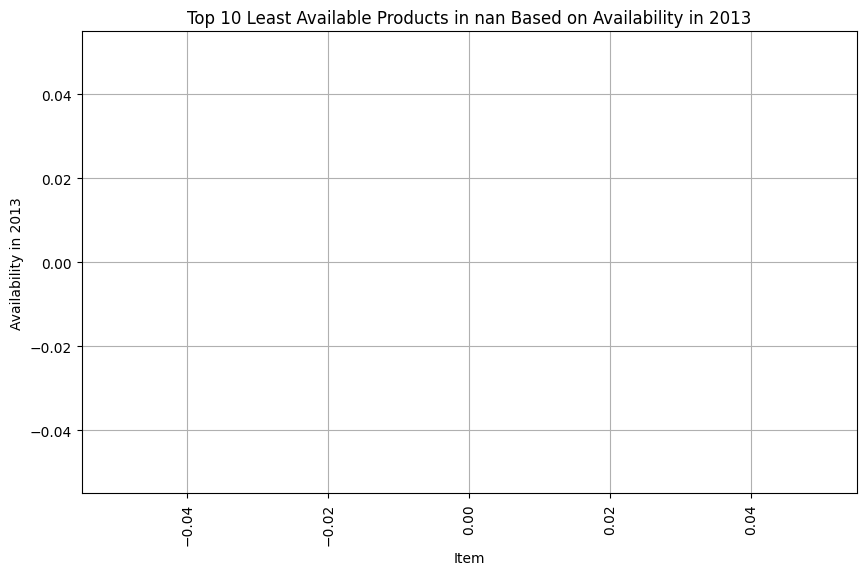

In [59]:
# Assuming fao_top DataFrame already has a 'Region' column
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Iterate over unique regions
regions = merged_df['region'].unique()
for region in regions:
    # Filter the data for the current region
    df_region = merged_df[merged_df['region'] == region]

    # Get the column for the most recent year (Y2013 in this case)
    recent_year_column = 'y2013'

    # Filter out rows with NaN values in the most recent year
    df_recent = df_region.dropna(subset=[recent_year_column])

    # Calculate the value for the most recent year per item for the current region
    df_recent_values = df_recent.groupby('item')[recent_year_column].sum().reset_index()
    df_recent_values = df_recent_values.rename(columns={recent_year_column: 'RecentYearValue'})

    # Get the top 10 items by the least availability in the most recent year
    df_least10 = df_recent_values.sort_values(by='RecentYearValue', ascending=True).head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(df_least10['item'], df_least10['RecentYearValue'], color='salmon')
    plt.title(f'Top 10 Least Available Products in {region} Based on Availability in 2013')
    plt.xlabel('Item')
    plt.ylabel('Availability in 2013')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

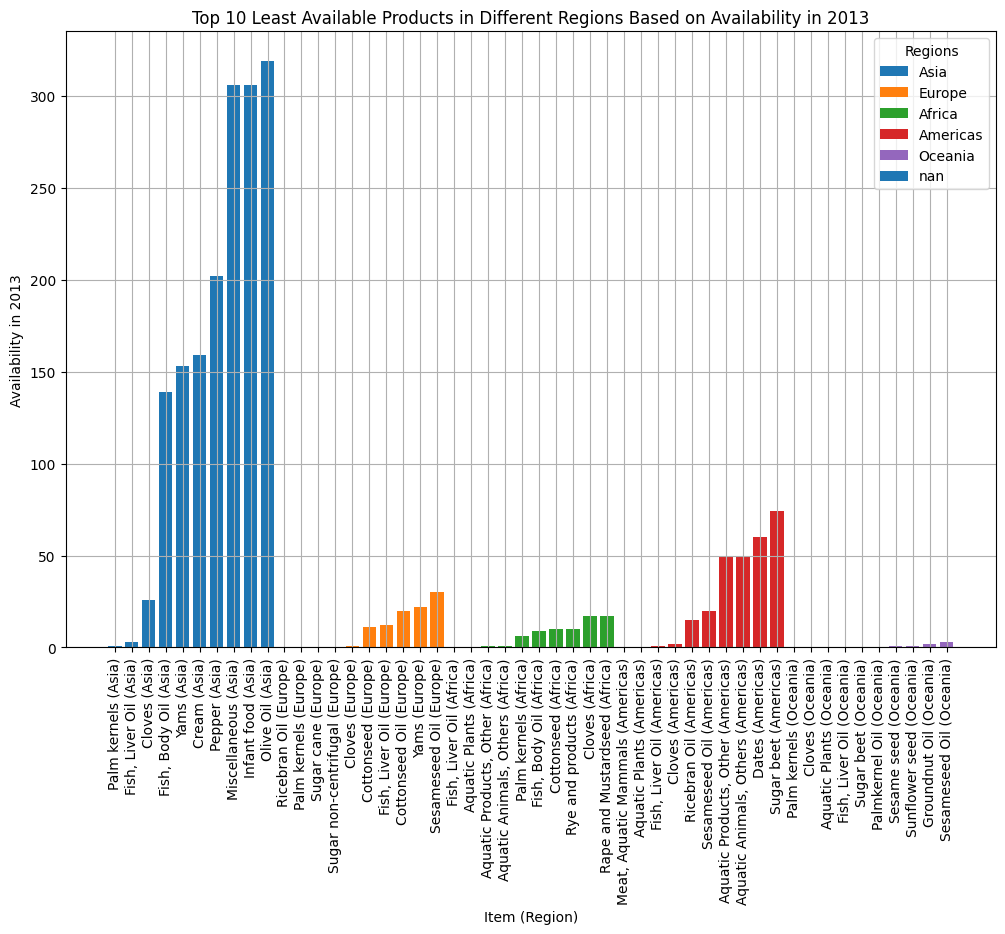

In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming fao_top DataFrame already has a 'Region' column
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Iterate over unique regions
regions = merged_df['region'].unique()

# Dictionary to store the top 10 least available items per region
region_items = {}

for region in regions:
    # Filter the data for the current region
    df_region = merged_df[merged_df['region'] == region]

    # Get the column for the most recent year (Y2013 in this case)
    recent_year_column = 'y2013'

    # Filter out rows with NaN values in the most recent year
    df_recent = df_region.dropna(subset=[recent_year_column])

    # Calculate the value for the most recent year per item for the current region
    df_recent_values = df_recent.groupby('item')[recent_year_column].sum().reset_index()
    df_recent_values = df_recent_values.rename(columns={recent_year_column: 'RecentYearValue'})

    # Get the top 10 items by the least availability in the most recent year
    df_least10 = df_recent_values.sort_values(by='RecentYearValue', ascending=True).head(10)

    # Store the results in the dictionary
    region_items[region] = df_least10

# Plotting
plt.figure(figsize=(12, 8))

# Generate a color map with as many distinct colors as there are regions
colors = cm.tab10.colors[:len(regions)]

for i, (region, df_least10) in enumerate(region_items.items()):
    plt.bar(df_least10['item'] + f" ({region})", df_least10['RecentYearValue'], color=colors[i], label=region)

plt.title('Top 10 Least Available Products in Different Regions Based on Availability in 2013')
plt.xlabel('Item (Region)')
plt.ylabel('Availability in 2013')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title="Regions")
plt.show()


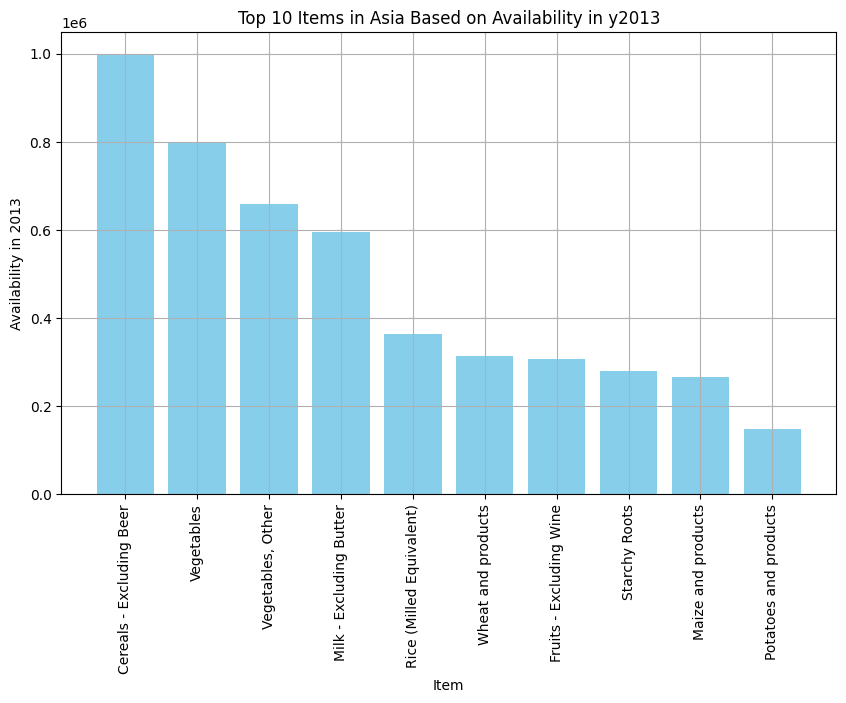

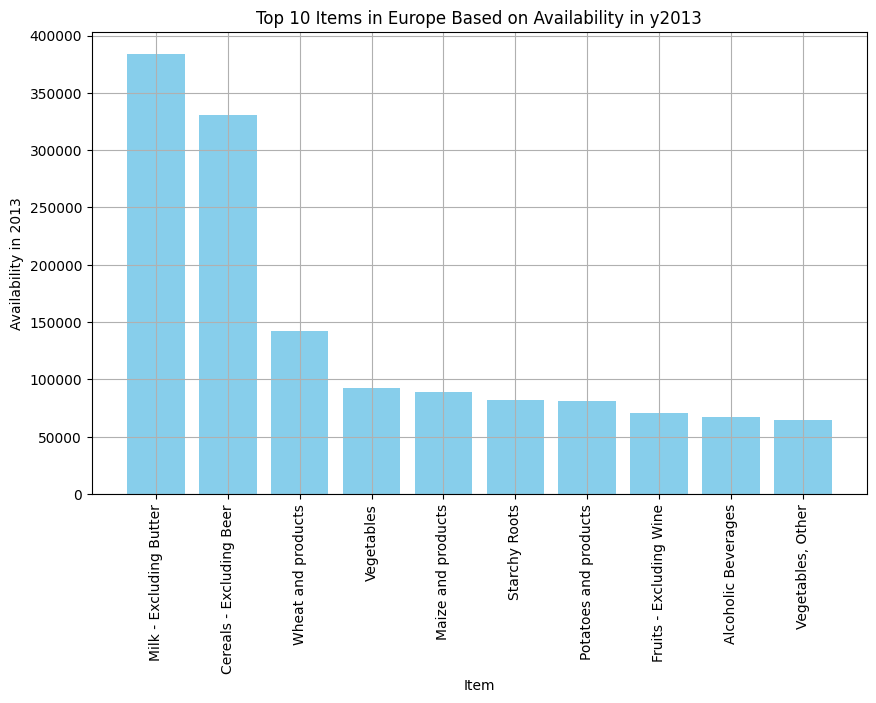

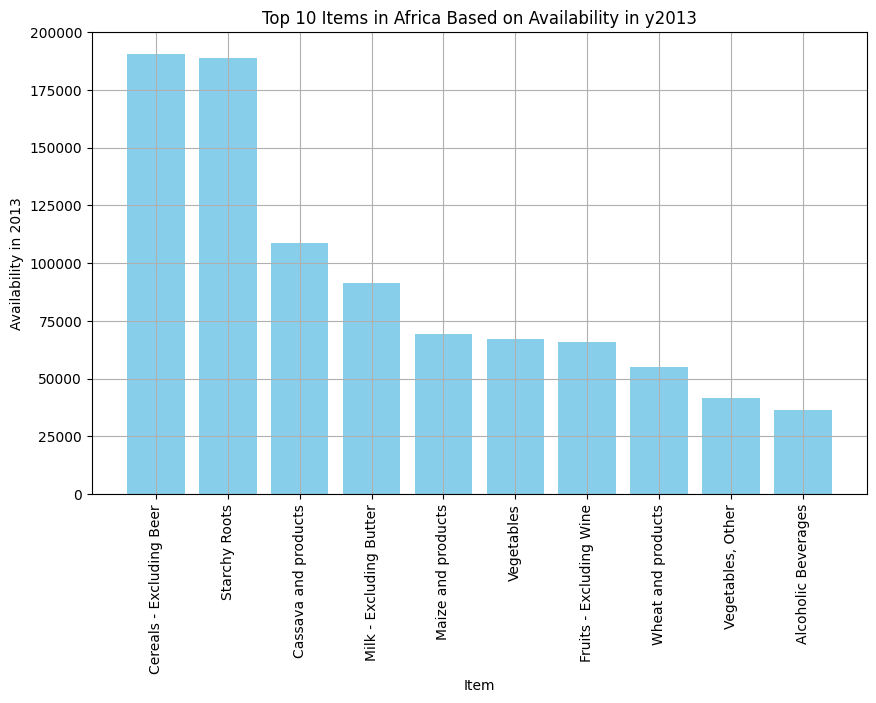

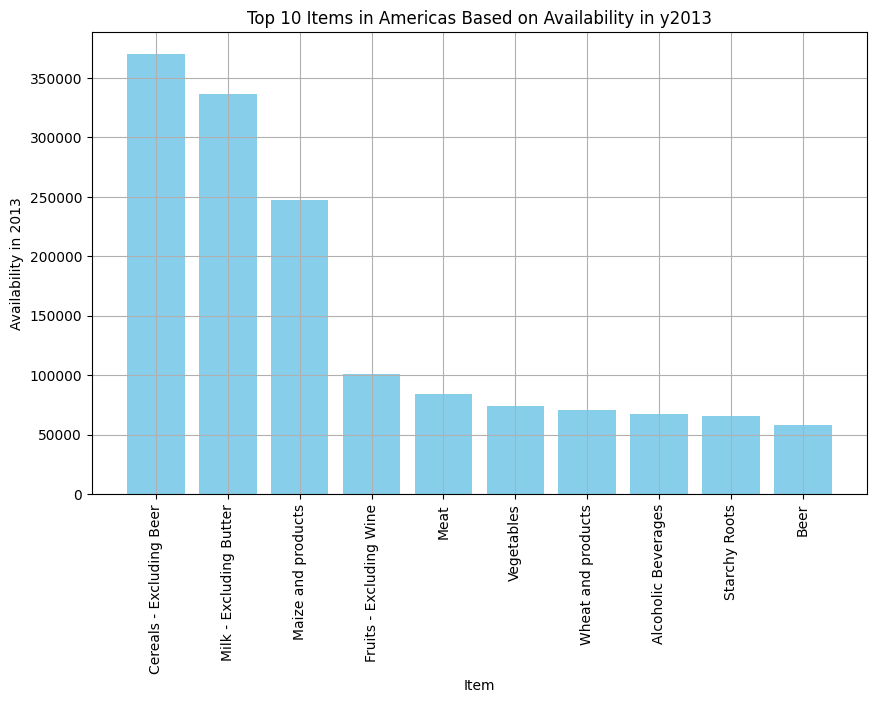

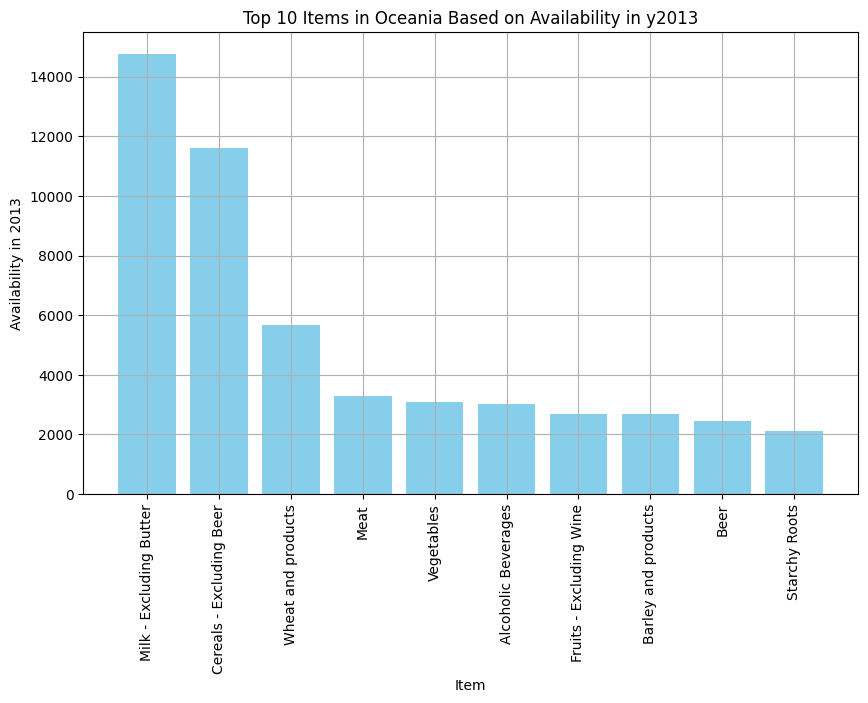

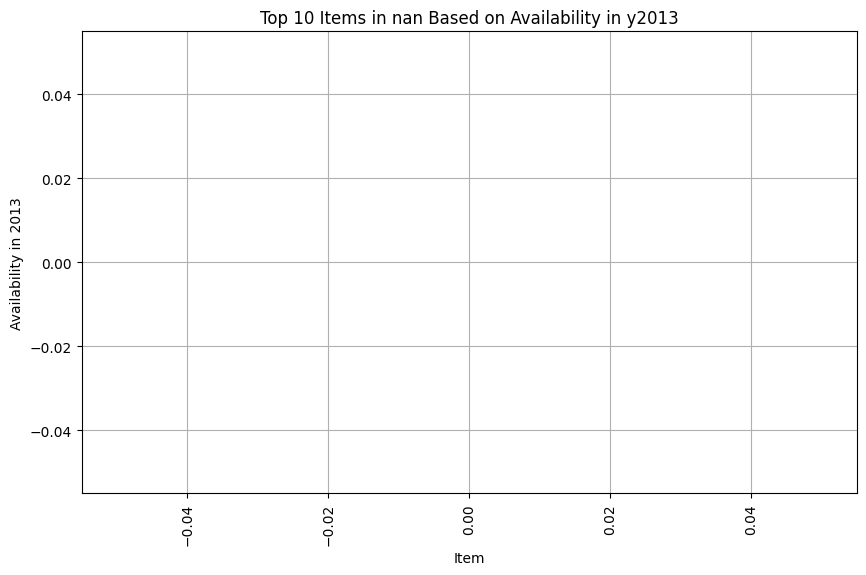

In [61]:
# Assuming fao_top DataFrame already has a 'Region' column
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Iterate over unique regions
regions = merged_df['region'].unique()
for region in regions:
    # Filter the data for the current region
    df_region = merged_df[merged_df['region'] == region]

    # Get the column for the most recent year (Y2013 in this case)
    recent_year_column = 'y2013'

    # Filter out rows with NaN values in the most recent year
    df_recent = df_region.dropna(subset=[recent_year_column])

    # Calculate the value for the most recent year per item for the current region
    df_recent_values = df_recent.groupby('item')[recent_year_column].sum().reset_index()
    df_recent_values = df_recent_values.rename(columns={recent_year_column: 'RecentYearValue'})

    # Get the top 10 items by value in the most recent year
    df_top10 = df_recent_values.sort_values(by='RecentYearValue', ascending=False).head(10)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(df_top10['item'], df_top10['RecentYearValue'], color='skyblue')
    plt.title(f'Top 10 Items in {region} Based on Availability in {recent_year_column}')
    plt.xlabel('Item')
    plt.ylabel('Availability in 2013')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

In [62]:
fao

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,...,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


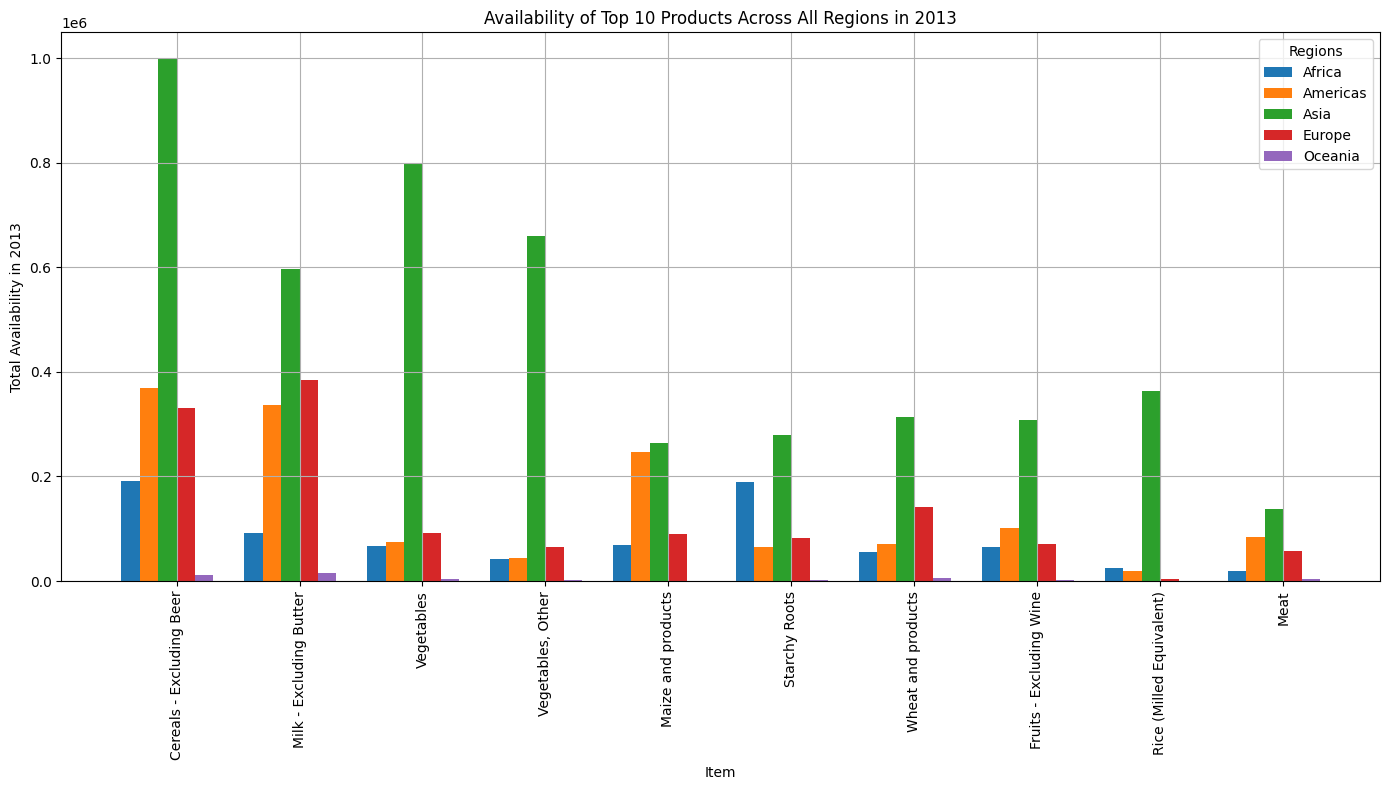

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming fao_top DataFrame already has a 'Region' column
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Get the column for the most recent year (Y2013 in this case)
recent_year_column = 'y2013'

# Filter out rows with NaN values in the most recent year
df_recent = merged_df.dropna(subset=[recent_year_column])

# Calculate the value for the most recent year per item per region
df_recent_values = df_recent.groupby(['item', 'region'])[recent_year_column].sum().unstack().fillna(0)

# Get the top 10 items by availability (most available products across all regions)
df_top_items = df_recent_values.sum(axis=1).sort_values(ascending=False).head(10).index
df_recent_values_top = df_recent_values.loc[df_top_items]

# Plotting
plt.figure(figsize=(14, 8))

# Define the number of regions
regions = df_recent_values_top.columns
n_regions = len(regions)

# Define bar width and the positions of the bars
bar_width = 0.15
bar_positions = np.arange(len(df_recent_values_top))

# Plotting bars for each region
for i, region in enumerate(regions):
    plt.bar(bar_positions + i * bar_width, df_recent_values_top[region], 
            width=bar_width, label=region)

# Set the x-ticks to be in the middle of the group of bars
plt.xticks(bar_positions + bar_width * (n_regions / 2), df_recent_values_top.index, rotation=90)

plt.title('Availability of Top 10 Products Across All Regions in 2013')
plt.xlabel('Item')
plt.ylabel('Total Availability in 2013')
plt.grid(True)

# Add legend
plt.legend(title="Regions")

plt.tight_layout()
plt.show()


In [64]:
df_recent_values

region,Africa,Americas,Asia,Europe,Oceania
item,,,,,
Alcoholic Beverages,36459.0,67561.0,86556.0,66939.0,3028.0
Animal fats,829.0,5520.0,10087.0,8480.0,255.0
Apples and products,2807.0,10474.0,42834.0,14574.0,624.0
"Aquatic Animals, Others",1.0,50.0,1150.0,42.0,6.0
Aquatic Plants,0.0,0.0,14459.0,160.0,0.0
...,...,...,...,...,...
Vegetables,67361.0,74355.0,796925.0,92466.0,3082.0
"Vegetables, Other",41526.0,44253.0,658934.0,64416.0,2019.0
Wheat and products,55057.0,70655.0,313725.0,142095.0,5673.0


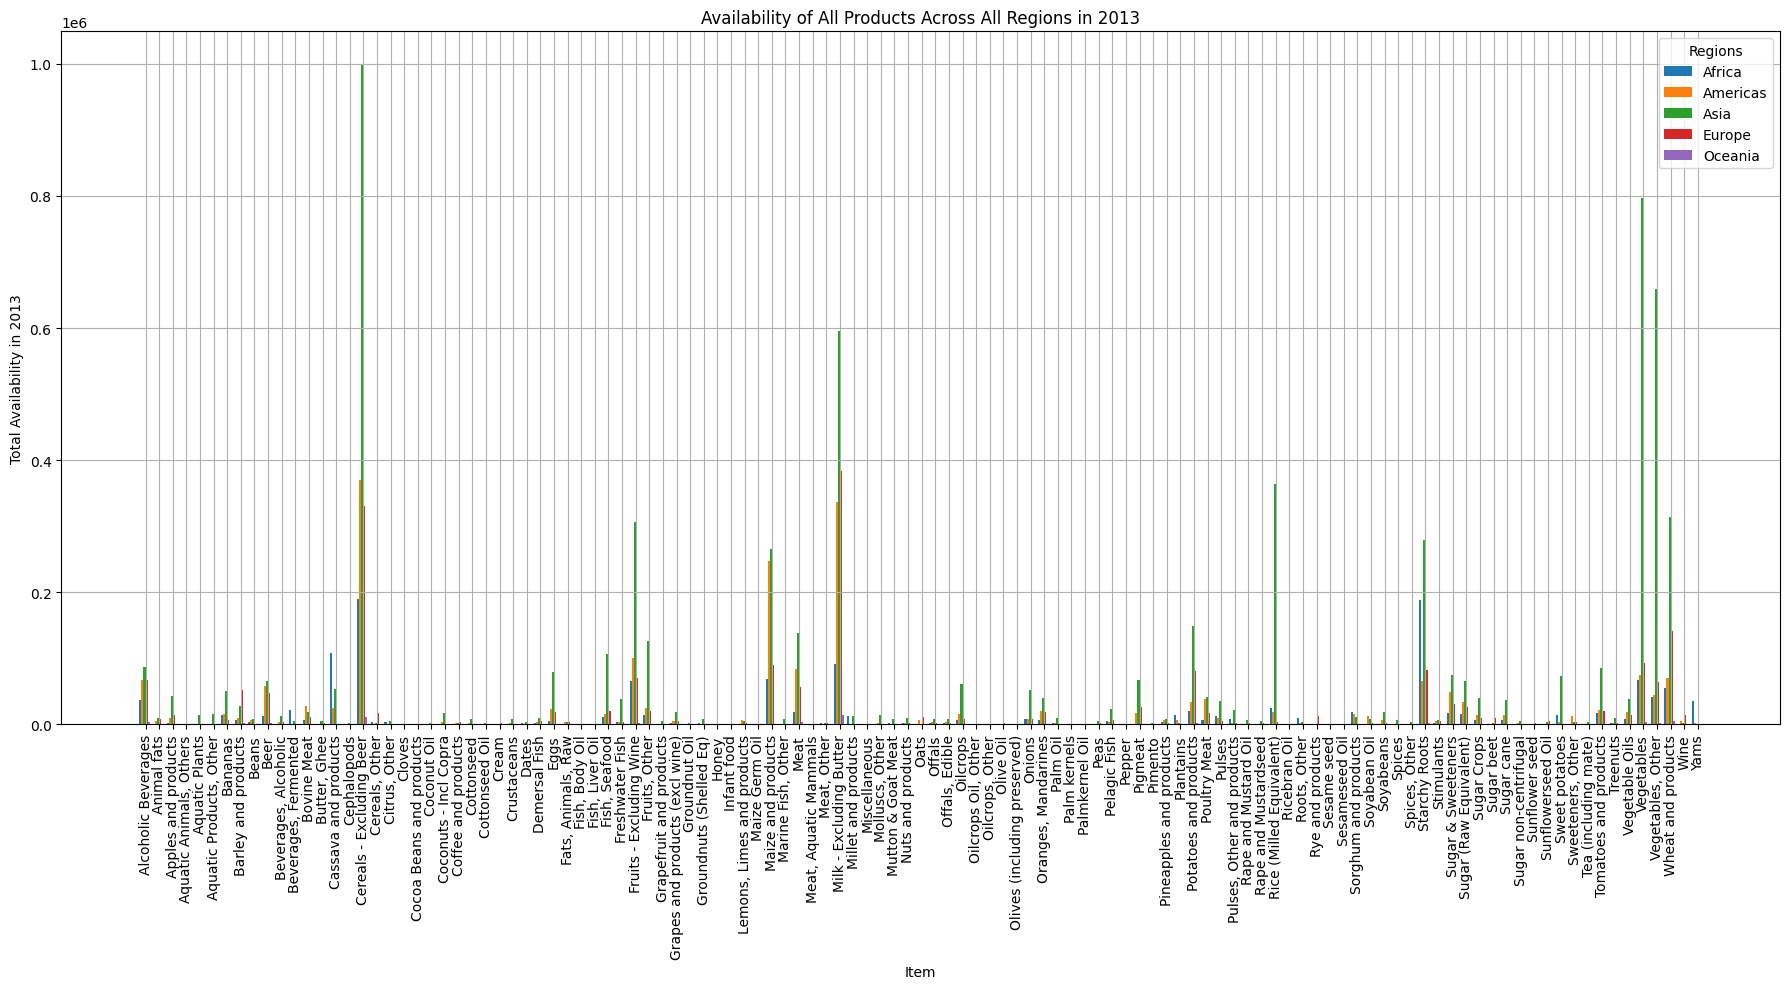

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming fao_top DataFrame already has a 'Region' column
fao_top = fao.drop(columns=['area_abbreviation', 'area_code', 'item_code', 'element_code', 'unit', 'latitude', 'longitude'])

# Get the column for the most recent year (Y2013 in this case)
recent_year_column = 'y2013'

# Filter out rows with NaN values in the most recent year
df_recent = merged_df.dropna(subset=[recent_year_column])

# Calculate the value for the most recent year per item per region
df_recent_values = df_recent.groupby(['item', 'region'])[recent_year_column].sum().unstack().fillna(0)

# Plotting
plt.figure(figsize=(18, 10))

# Define the number of regions
regions = df_recent_values.columns
n_regions = len(regions)

# Define bar width and the positions of the bars
bar_width = 0.15
bar_positions = np.arange(len(df_recent_values))

# Plotting bars for each region
for i, region in enumerate(regions):
    plt.bar(bar_positions + i * bar_width, df_recent_values[region], 
            width=bar_width, label=region)

# Set the x-ticks to be in the middle of the group of bars
plt.xticks(bar_positions + bar_width * (n_regions / 2), df_recent_values.index, rotation=90)

plt.title('Availability of All Products Across All Regions in 2013')
plt.xlabel('Item')
plt.ylabel('Total Availability in 2013')
plt.grid(True)

# Add legend
plt.legend(title="Regions")

plt.tight_layout()
plt.show()


In [66]:
faostat

,domain_code,domain,area_code,area,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description,note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,35530.081,X,International reliable sources,"UNDESA, Population Division â World Populati..."
1,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,2930.187,X,International reliable sources,"UNDESA, Population Division â World Populati..."
2,OA,Annual population,4,Algeria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,41318.142,X,International reliable sources,"UNDESA, Population Division â World Populati..."
3,OA,Annual population,5,American Samoa,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,55.641,X,International reliable sources,"UNDESA, Population Division â World Populati..."
4,OA,Annual population,6,Andorra,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,76.965,X,International reliable sources,"UNDESA, Population Division â World Populati..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,OA,Annual population,205,Western Sahara,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,552.628,X,International reliable sources,"UNDESA, Population Division â World Populati..."
227,OA,Annual population,249,Yemen,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,28250.420,X,International reliable sources,"UNDESA, Population Division â World Populati..."
228,OA,Annual population,251,Zambia,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,17094.130,X,International reliable sources,"UNDESA, Population Division â World Populati..."
229,OA,Annual population,181,Zimbabwe,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000 persons,16529.904,X,International reliable sources,"UNDESA, Population Division â World Populati..."


In [67]:
import pandas as pd

melted_df = pd.melt(fao, 
                    id_vars=['area'], 
                    value_vars=[f'y{year}' for year in range(1961, 2014)],
                    var_name='year_col',
                    value_name='production_value')

melted_df['year'] = melted_df['year_col'].str.extract('(\d+)').astype(int)

melted_df = melted_df.drop(columns=['year_col'])


grouped_df = melted_df.groupby(['year', 'area'])['production_value'].mean().reset_index()

print(grouped_df.head())


   year                 area  production_value
0  1961          Afghanistan        114.228916
1  1961              Albania         13.869919
2  1961              Algeria         60.387097
3  1961               Angola         44.348624
4  1961  Antigua and Barbuda          0.786325


In [68]:

import plotly.express as px
fig = px.choropleth(
    grouped_df,
    locations='area',
    locationmode='country names',
    color='production_value',
    animation_frame='year',
    title='Total Production per Country (1961 - 2013)',
    color_continuous_scale="Viridis",
    labels={'production_value': 'Total Production'}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    ),
    title_text='Total Production per Country (1996 - 2013)',
    title_x=0.5
)

fig.show()

# Save the animation as an HTML file (optional)
fig.write_html('total_production_per_year_choropleth.html')


